<a href="https://colab.research.google.com/github/unablebagel/Qwiklabs/blob/main/PDS_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDS Assignment 2
Title of data analysis: Overview on the changes in mobile data usage, service coverage and cellular network standard in Singapore.

Name: Ho Jie Jin Winson
Class: EL/EP0302/FT/01
Course: DISM

## Dataset 1 & 2

Dataset 1: Mobile Data Usage https://data.gov.sg/dataset/mobile-data-usage

Dataset 2: Total SMS Messages sent and received over mobile network https://data.gov.sg/dataset/volume-of-sms-messages

**Questions:**
1. What is the mobile data usage trend in Singapore over the years?
2. What is the relationship between mobile data usage and volume of SMS?

In [10]:
# A function to print text analysis. Make sure to run this first
def text_analysis():
    print('This is the shape of the dataset')
    print(df.shape)
    print('\nThis is the index of the dataset')
    print(df.index)
    print('\nThese are the columns in the dataset')
    print(df.columns)
    print('\nA summary of this dataset is shown below:')
    print(df.info())
    print('\nA descriptive statistical summary of this dataset is shown below:')
    print(df.describe())

In [11]:
import pandas as pd

df = pd.read_csv('./data/mobile-data-usage.csv')
print('Dataset 1:\n')
text_analysis()
df =  pd.read_csv('./data/total-sms-messages-sent-and-received-over-mobile-network.csv')
print('\nDataset 2:\n')
text_analysis()


Dataset 1:

This is the shape of the dataset
(59, 2)

This is the index of the dataset
RangeIndex(start=0, stop=59, step=1)

These are the columns in the dataset
Index(['quarter', 'volume_of_mobile_data'], dtype='object')

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                59 non-null     object 
 1   volume_of_mobile_data  59 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB
None

A descriptive statistical summary of this dataset is shown below:
       volume_of_mobile_data
count              59.000000
mean                6.113605
std                 6.156562
min                 0.000384
25%                 0.210242
50%                 4.077960
75%                10.331968
max                20.535048

Dataset 2:

This is the shape of the da

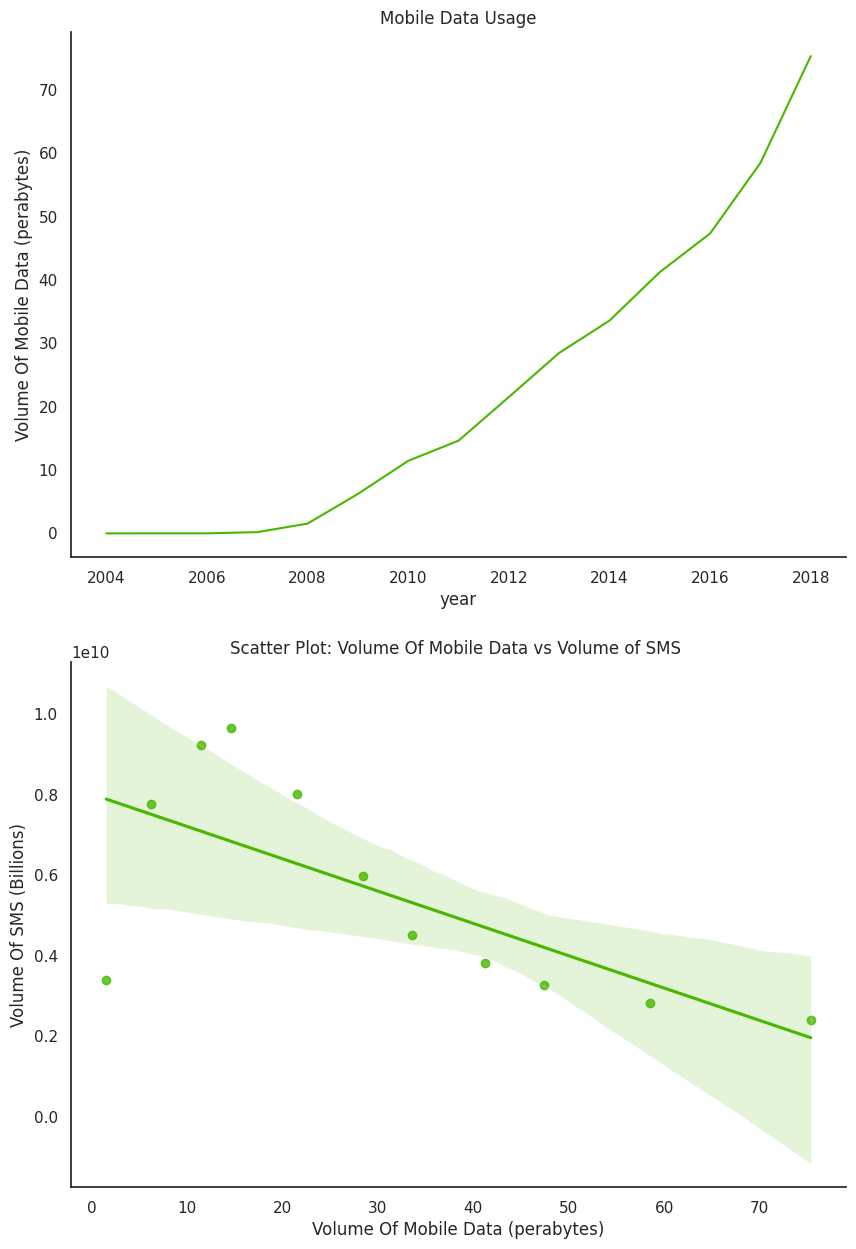

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set_style('white')
sns.set_palette('brg_r')


df = pd.read_csv('./data/mobile-data-usage.csv')
# df_2 = pd.read_csv('./data/mobile-penetration-rate.csv')
df_2 =  pd.read_csv('./data/total-sms-messages-sent-and-received-over-mobile-network.csv')

years = []
usage=[]
penetration=[]

for year in range(2004,2019): # til 2018 as 2019 data is incomplete (only 2019-Q1 is recorded)
    years.append(year)

string_ints = [str(int) for int in years]

# print(string_ints)

# Extract dataset with months from 2017
for year in string_ints:
    df_year = df[df['quarter'].str.contains(year)]
    usage.append(df_year['volume_of_mobile_data'].sum())
    df_year = df_2[df_2['quarter'].str.contains(year)]
    penetration.append(df_year['volume_of_sms'].sum())

# print(usage)
# print(penetration)
data_plot = pd.DataFrame({"volume_of_mobile_data":usage, "volume_of_sms":penetration, "year":years})

mask = data_plot.loc[:,'year'] >=2008 #get data from 2008 onwards for scatter plot as second dataset only starts from 2008
data_plot_2008=data_plot[mask]
# display(data_plot_2008)

# display(data_plot)
fig, axes = plt.subplots(2,1, figsize=(10, 15))

axes[0].set_title('Mobile Data Usage')
line_plot=sns.lineplot(ax=axes[0],x="year", y="volume_of_mobile_data",data=data_plot)
line_plot.set_ylabel('Volume Of Mobile Data (perabytes)')

axes[1].set_title('Scatter Plot: Volume Of Mobile Data vs Volume of SMS ')
scatter_plot=sns.regplot(ax=axes[1], #scatter plot with regression line with confidence interval band
            x="volume_of_mobile_data",
            y="volume_of_sms",
            data=data_plot_2008)
scatter_plot.set_ylabel('Volume Of SMS (Billions)')
scatter_plot.set_xlabel('Volume Of Mobile Data (perabytes)')

sns.despine()
plt.show()

**Process:**

The first dataset, Mobile Data Usage, contains the quarter and volume of mobile data in petabytes(2^15). For this dataset, I decided to plot a line chart to capture the mobile data usage trend from 2014 to 2018. The second dataset, Mobile Penetration Rate contains the quarter and volume of SMS. I decided to use the volume of SMS and volume of mobile data in the previous dataset to plot a scatter plot to find out how has the volume of mobile usage affected the volume of SMS. As values in both dataset are recorded in quarters(e.g 2019-Q1), I decided to merge all the quarters in a year together to make visualisation easier and to avoid overplotting the scatter plot.

**Insights:**

Looking at the line chart for the mobile data usage, we can see that the mobile data usage from 2004 to 2008 is extremely low, nearing zero. From 2008 onwards, we start to observe a gradual increase before seeing a drastic increase in 2011 and 2016. The explanation for the extremely low data usage from 2004 to 2008 is because the internet was still quite new back then and still growing and mobile data is scarce/not fully developed.

According to an article from Straits Times, all three telcos launched commercial 3G services in 2005 which offered consumers the ability to make video calls, watch streaming video clips and surf the Internet at high speeds for the first time.

Despite the promises of the technology, consumers did not warm up to 3G services as quickly as the telcos would have liked. By the end of September 2005, only about 1 per cent of users had taken up 3G, partly due to public perception that the services were expensive. It took the launch of Apple’s iPhone in 2007 and the subsequent rise of the app revolution – before 3G services finally hit mainstream, which explains the rise of mobile data usage in 2008 onwards. And in late 2011 and 2012 all three telco launched 4G services with 95% coverage which explains the spike in 2011-2012 onwards.

By plotting the volume of mobile data usage and volume of SMS between 2008 and 2018, we can see that as the volume of mobile data usage increases, the volume of SMS is decreasing. As mobile data becomes more popular, people start to opt for OTT (Over the Top) application such as WhatsApp and other messaging apps. These apps are different than SMS services because they use internet protocols (IP) rather than cellular networks to transmit messages. This means these messages are sent through an internet connection (aka WiFi) or via mobile internet connection.
OTT application are generaly preferred now as they provide end-to-end encrpytion, better for media sharing and provides more features such as group messaging, audio/video calling. Given the ubiquity of internet connection globally, apps that replace SMS have seen rapid expansion, which explains the drop in the volume of SMS and rise in mobile data usage in the past decade.

**References**

https://graphics.straitstimes.com/STI/STIMEDIA/Interactives/2015/10/35-years-of-ict/supercharging-singapore/the-2000s.html
https://www.popularmechanics.com/technology/security/a29789903/what-is-sms/

## Dataset 3

Dataset 3: 3G Public Cellular Mobile Telephone Services - Nation-wide Service Coverage https://data.gov.sg/dataset/3g-public-cellular-mobile-telephone-services-nation-wide-service-coverage

**Questions:**

1. Which telco has the highest service coverage for 3G cellular network?
2. What is the service coverage trend?
2. Which telco is the most consistent?

In [13]:
import pandas as pd

df= pd.read_csv('./data/3g-public-cellular-mobile-telephone-services-nation-wide-service-coverage.csv', sep=',')
print('Dataset 3:\n')
text_analysis()

Dataset 3:

This is the shape of the dataset
(117, 3)

This is the index of the dataset
RangeIndex(start=0, stop=117, step=1)

These are the columns in the dataset
Index(['month', 'telco', 'service_coverage'], dtype='object')

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             117 non-null    object 
 1   telco             117 non-null    object 
 2   service_coverage  117 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB
None

A descriptive statistical summary of this dataset is shown below:
       service_coverage
count        117.000000
mean          99.526752
std            0.355913
min           97.870000
25%           99.380000
50%           99.630000
75%           99.730000
max           99.930000


<ipython-input-14-6962c2f33bca>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


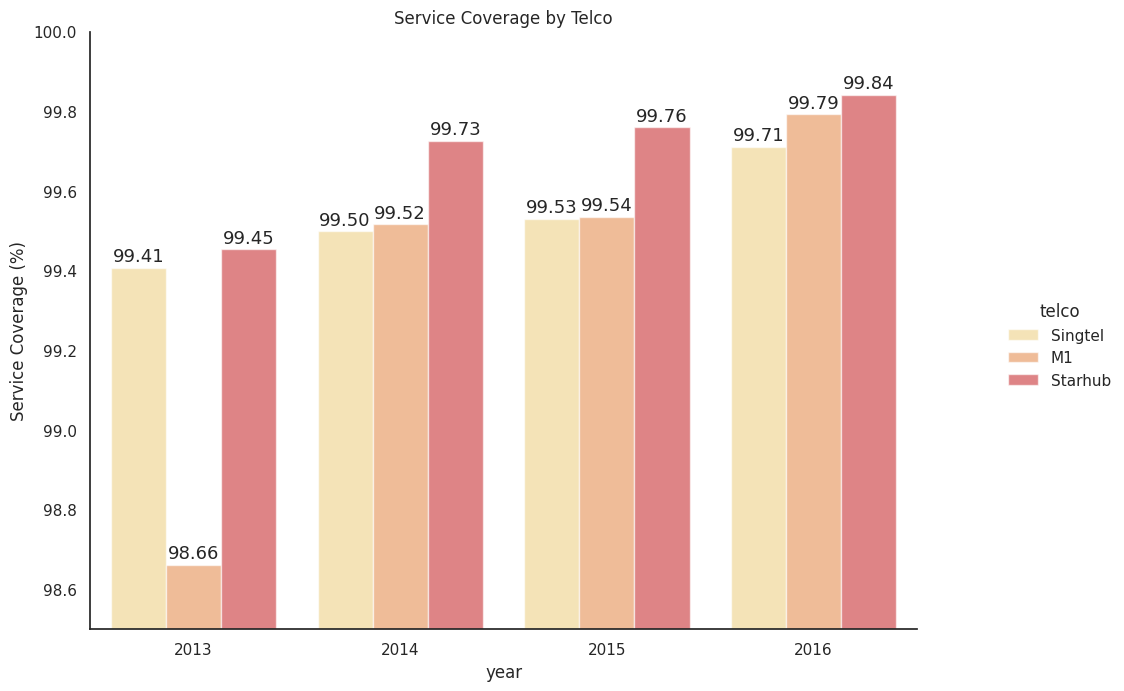

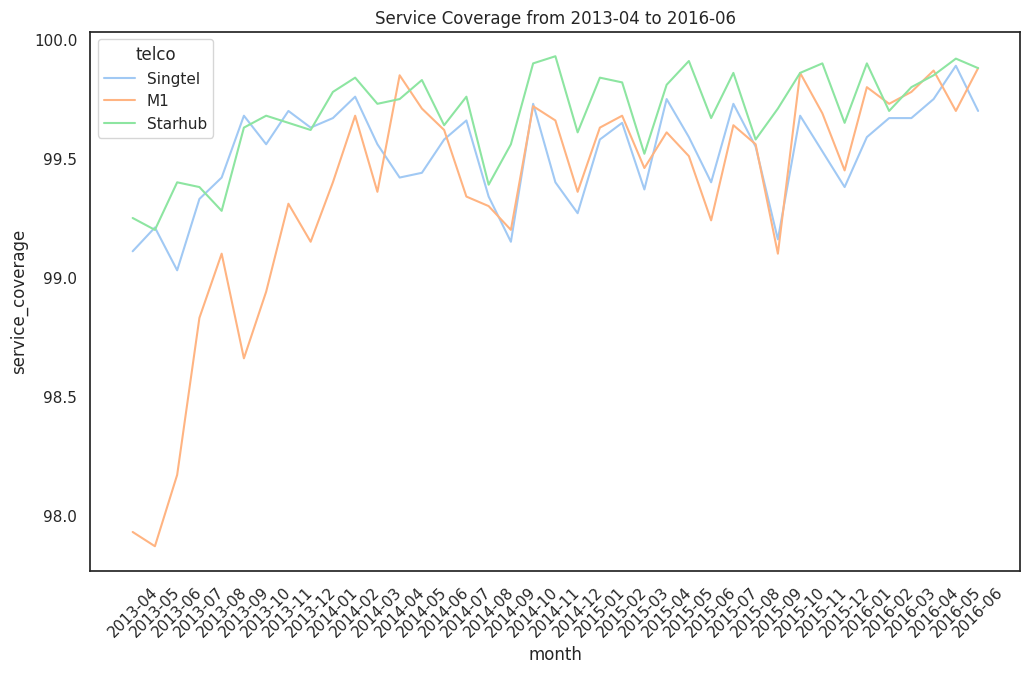

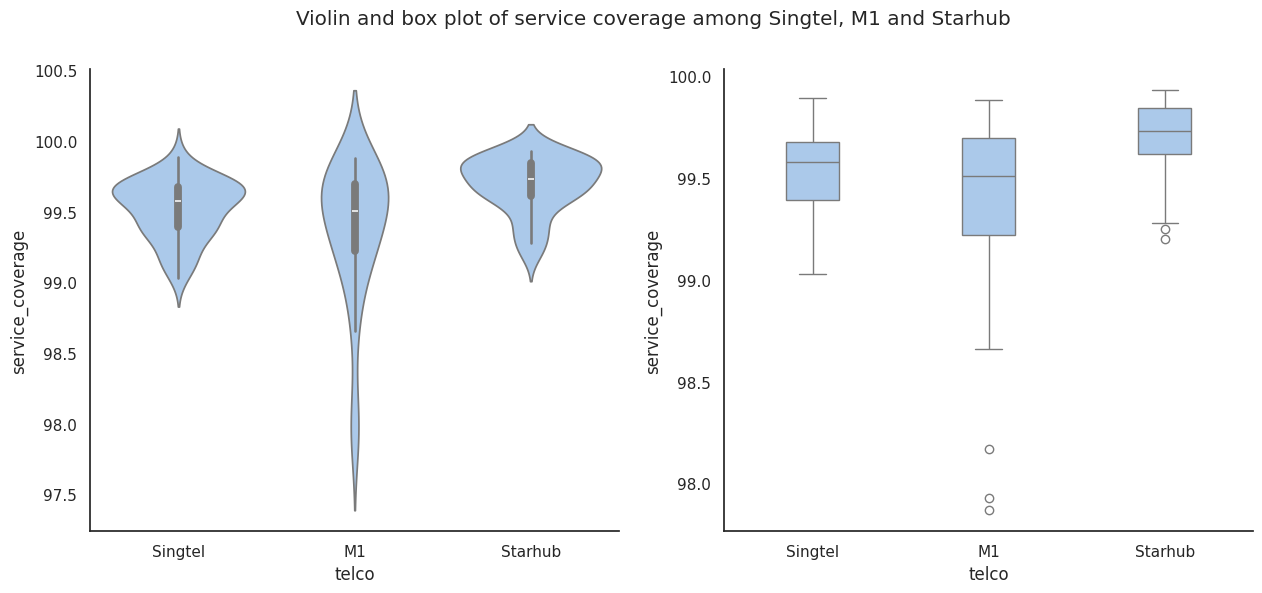

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_palette("pastel")

df= pd.read_csv('./data/3g-public-cellular-mobile-telephone-services-nation-wide-service-coverage.csv', sep=',')

years = []
coverage=[]

for year in range(2013,2017):
    years.append(year)

string_ints = [str(int) for int in years]

for year in string_ints:
    df_year = df[df['month'].str.contains(year)]
    df_singtel=df_year[df_year.telco =='Singtel']
    coverage.append(df_singtel['service_coverage'].mean())
    df_m1=df_year[df_year.telco =='M1']
    coverage.append(df_m1['service_coverage'].mean())
    df_starhub=df_year[df_year.telco =='Starhub']
    coverage.append(df_starhub['service_coverage'].mean())

telco=['Singtel','M1','Starhub']
years_col=years*len(telco)
years_col.sort()
telco=telco*len(years)

data_plot = pd.DataFrame({"year":years_col,"telco":telco, "service_coverage":coverage})

# grouped barchart
# plt.figure(1)
g = sns.catplot(
    data=data_plot, kind="bar",
    x="year", y="service_coverage",hue='telco', #need to change this to year
    ci="sd", palette="YlOrRd", alpha=.6, height=6
).set(title='Service Coverage by Telco', ylabel='Service Coverage (%)')

for ax in g.axes.ravel():
    for bar in ax.patches:

      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        ax.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')


g = g.set(ylim=(98.5,100))
g.fig.set_figwidth(12)
g.fig.set_figheight(7)


plt.show()

plt.figure(2, figsize=(12,7))

line_plot=sns.lineplot(x=df.month, y=df.service_coverage, hue=df.telco,data=df)
plt.title('Service Coverage from 2013-04 to 2016-06')
plt.xticks(rotation=45)


plt.figure(3, figsize=(15,6)) #violin and boxplot
plt.subplot(121)

violin_plot= sns.violinplot(x=df.telco, y=df.service_coverage, data=df)

plt.subplot(122)
box_plot=sns.boxplot( x=df.telco, y=df.service_coverage, width=0.3, data=df);

sns.despine()
plt.suptitle("Violin and box plot of service coverage among Singtel, M1 and Starhub")



plt.show()


**Process:**

This dataset contains the month, telco and service coverage from 2013 to 2016. This indicator measures Nation-Wide Outdoor Service Coverage for the 3G cellular network. Service coverage is determined by signal strength. The availability of service coverage is the ability of a cellular network to achieve the minimum signal strength of at least -100dBm. For this dataset, I decided to plot a bar chart to comapre the service coverage percentage of the 3 telcos from 2013 to 2016 to see which telco has the highest service coverage. Next, I choose to plot a box/violin plot to compare the min, max and median rate as well as to see the distrubution and consistency among the 3 telcos.

**Insights:**

From the bar chart, we can see that Starhub's service coverage has been the highest throughout the years. In 2013, M1's service coverage was significantly lower than its competitors, at only 98.66%. However, it managed to catch up in 2014 and beat Singtel
narrowingly in the subsequent years. Under IDA's 3G Public Cellular Mobile Telephone Service ("PCMTS") QoS framework, mobile operators are required to achieve Nation-Wide Outdoor Service Coverage of >99%. According to Straits Times, M1 was fined $25,000 for failing to meet 3G outdoor coverage in 2013 which explains M1's improvement from 2013 onwards to meet the standard requiremnet.

From the line plot, we can see that throughout the months in a year, the service coverage by the 3 telcos fluctuate regularly. To find out which telco has the most consistent service coverage, we can take a look at the bar and violin plot.

By looking at the box and violin plot, we can tell that Starhub's service coverage has been the most consistent througout the months as the box is shorter than its competitors (Lower IQR). By comparing the median, Starhub's service coverage has also been the highest, followed closely by Singtel and M1.

**References**

https://www.straitstimes.com/singapore/m1-fined-25000-for-failing-to-meet-3g-outdoor-coverage

## Dataset 4

Dataset 4: Total Number of Mobile Subscriptions by Type https://data.gov.sg/dataset/total-2g-mobile-subscriptions?resource_id=5fcb4916-1c0c-4dd8-be5a-6a8bf17c4da5

**Questions:**
1. What the ratio of 2G, 3G and 4G subscriptions throughout the years?
2. What is the popularity of prepaid and postpaid plans over the years?

In [15]:
import pandas as pd

df= pd.read_csv('./data/total-number-of-mobile-subscriptions-by-type.csv', sep=',')
print('Dataset 4:\n')
text_analysis()

Dataset 4:

This is the shape of the dataset
(868, 4)

This is the index of the dataset
RangeIndex(start=0, stop=868, step=1)

These are the columns in the dataset
Index(['month', 'network_access_technology', 'type_of_plan',
       'number_of_subscriptions'],
      dtype='object')

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      868 non-null    object
 1   network_access_technology  868 non-null    object
 2   type_of_plan               868 non-null    object
 3   number_of_subscriptions    868 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 27.2+ KB
None

A descriptive statistical summary of this dataset is shown below:
       number_of_subscriptions
count             8.680000e+02
mean              1.590790e+06
std               1.38298

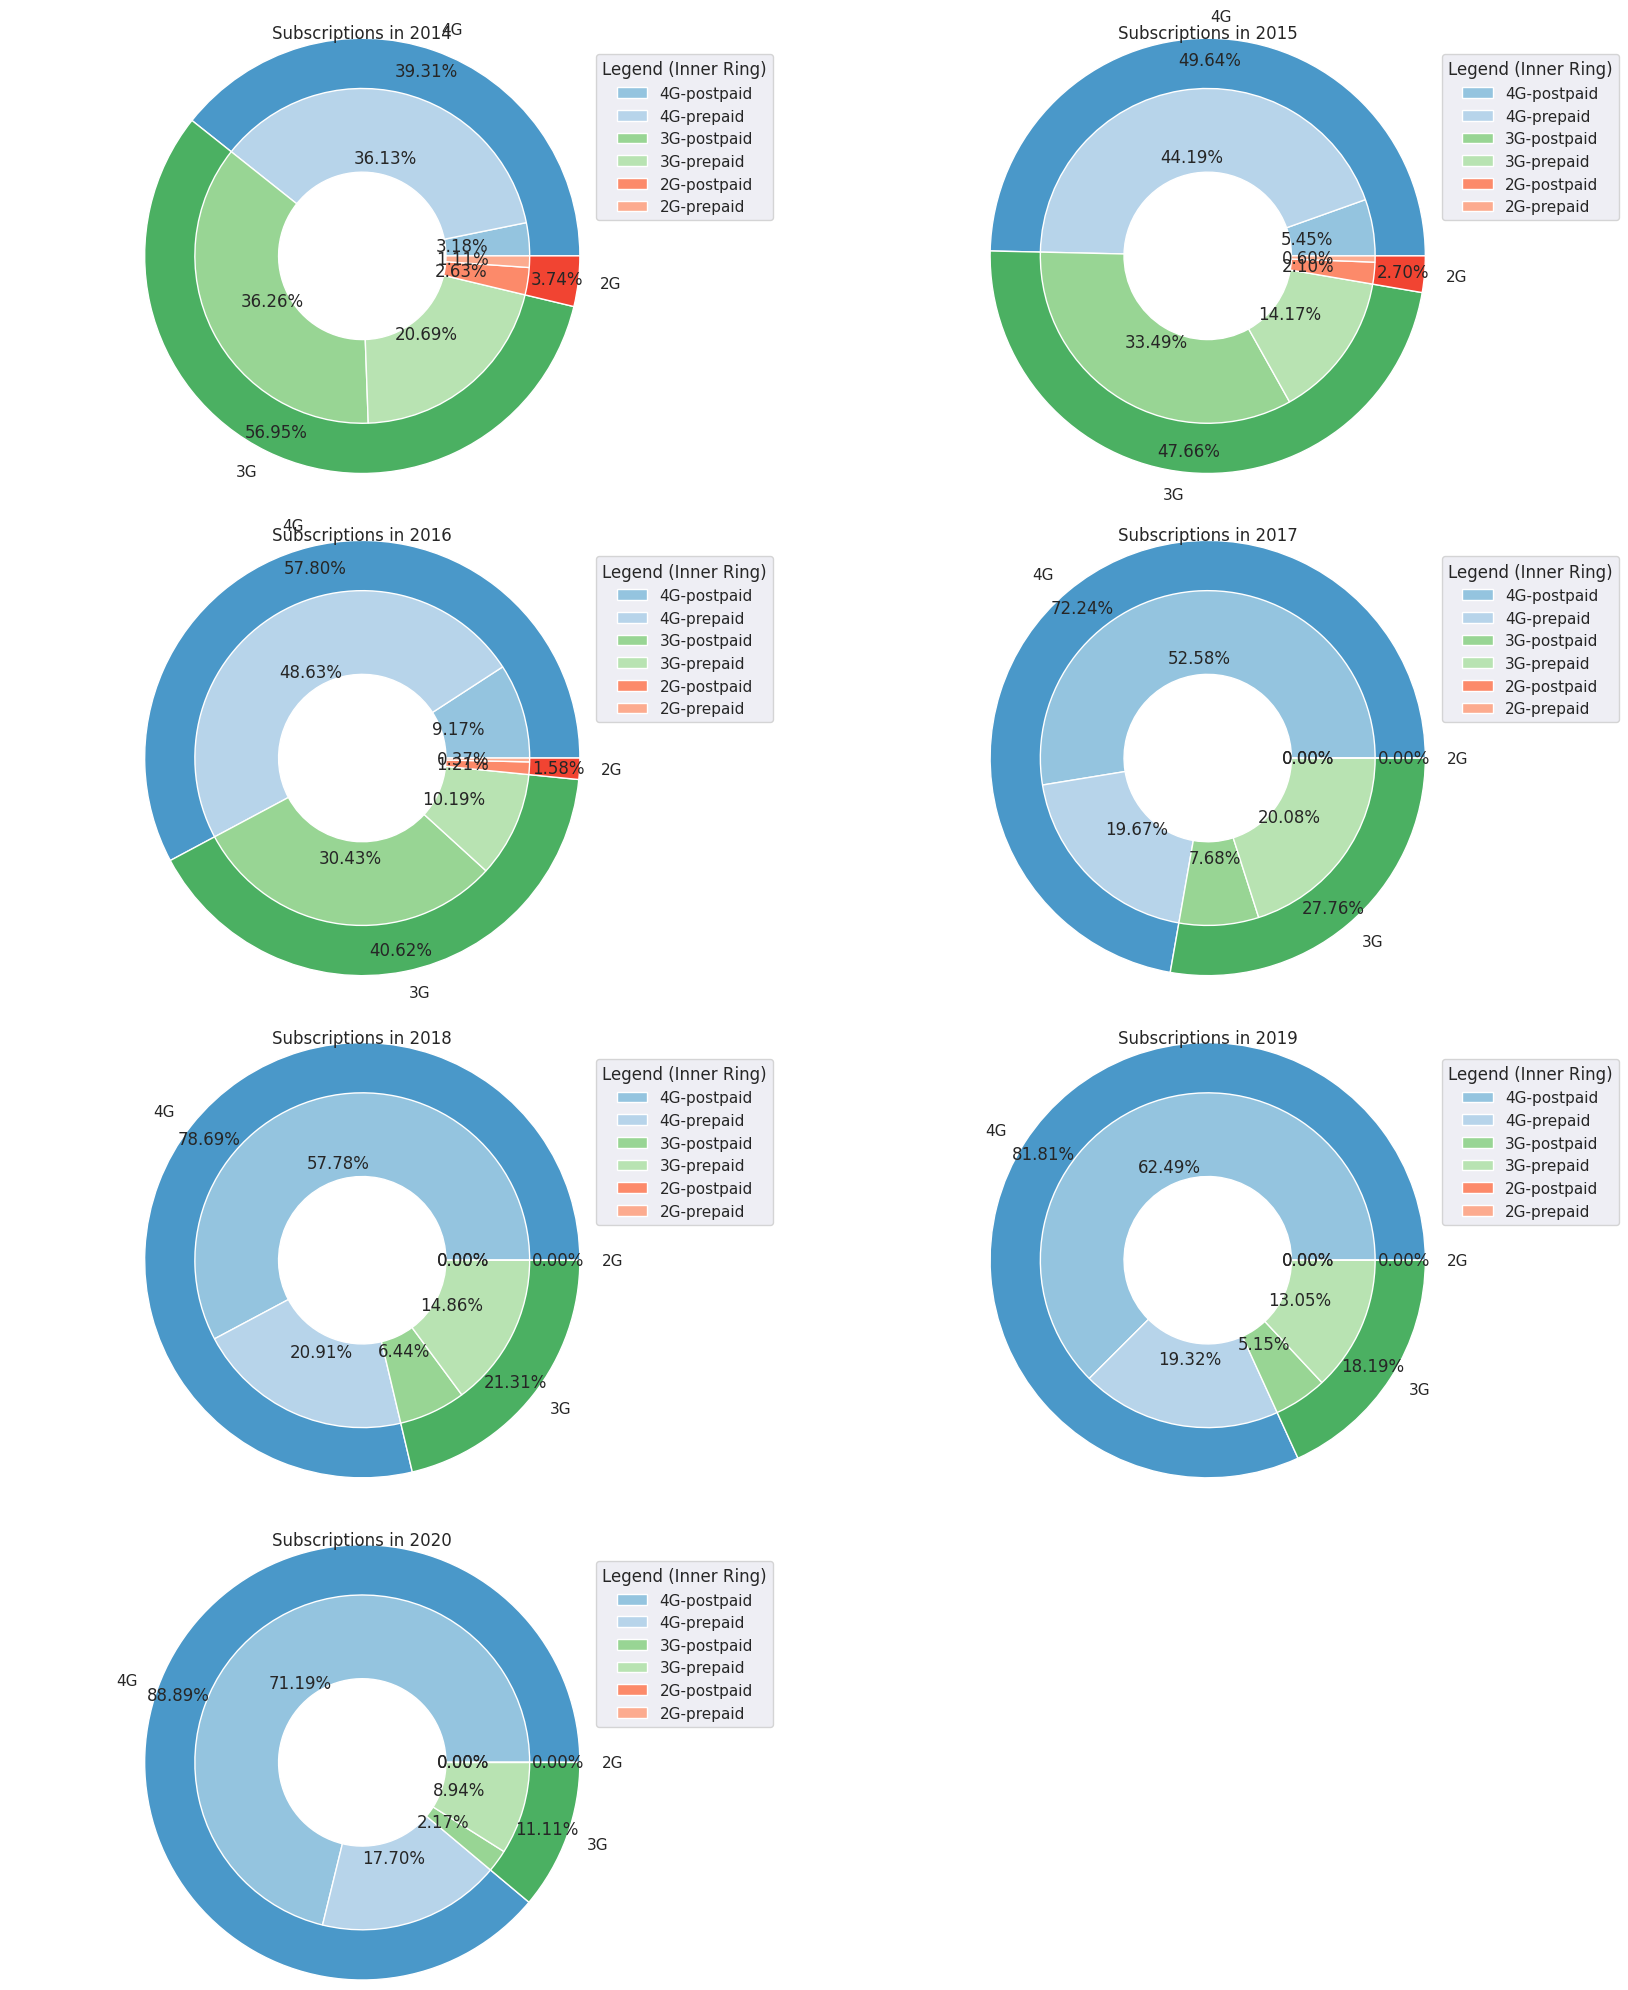

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


df= pd.read_csv('./data/total-number-of-mobile-subscriptions-by-type.csv', sep=',')

years = []

for year in range(2014,2021): # get year data from 2014 to 2020
    years.append(year)

string_ints = [str(int) for int in years] # convert int to string for regex

column_names = ["month", "network_access_technology", "type_of_plan","number_of_subscriptions"] #columns for new data frame

df_latest_months = pd.DataFrame(columns = column_names) # create an emtpy data frame

for year in string_ints:
    df_year = df[df['month'].str.contains(year)][-6:]# regex to match for year. slice the last 6 (3 types of network technology multiply by 2 types of plans) rows as we only want the lastest month in the year

    df_latest_months=pd.concat([df_latest_months,df_year]) # append rows from each year to new data frame (concat)


# display(df_latest_months)

# Create colors
a, b,c =[plt.cm.Blues, plt.cm.Greens, plt.cm.Reds]
fig, ax = plt.subplots(figsize=(20,25))
ax.axis("off")

for year,num in zip(string_ints,range(1,8)):
    df_2G=df_latest_months[(df_latest_months.network_access_technology =='2G') & (df_latest_months['month'].str.contains(year))]
    df_2G_prepaid=df_2G[(df_2G.type_of_plan =='pre-paid')] # get 2G prepaid
    df_2G_postpaid=df_2G[(df_2G.type_of_plan =='post-paid')] # get 2G postpaid

    df_3G=df_latest_months[(df_latest_months.network_access_technology =='3G') & (df_latest_months['month'].str.contains(year))]
    df_3G_prepaid=df_3G[(df_3G.type_of_plan =='pre-paid')] # get 3G prepaid
    df_3G_postpaid=df_3G[(df_3G.type_of_plan =='post-paid')] # get 3G postpaid

    df_4G=df_latest_months[(df_latest_months.network_access_technology =='4G') & (df_latest_months['month'].str.contains(year))]
    df_4G_prepaid=df_4G[(df_4G.type_of_plan =='pre-paid')] # get 4G prepaid
    df_4G_postpaid=df_4G[(df_4G.type_of_plan =='post-paid')] # get 4G postpaid

    group_names=['4G', '3G', '2G']
    group_size=[df_4G['number_of_subscriptions'].sum(),
                df_3G['number_of_subscriptions'].sum(),
                df_2G['number_of_subscriptions'].sum()]

    subgroup_names=['4G-postpaid', '4G-prepaid','3G-postpaid','3G-prepaid','2G-postpaid','2G-prepaid' ]
    subgroup_size=[df_4G_postpaid['number_of_subscriptions'].sum(), df_4G_prepaid['number_of_subscriptions'].sum(),
                   df_3G_postpaid['number_of_subscriptions'].sum(), df_3G_prepaid['number_of_subscriptions'].sum(),
                   df_2G_postpaid['number_of_subscriptions'].sum(), df_2G_prepaid['number_of_subscriptions'].sum()]


    # First Ring (outside)

    ax = fig.add_subplot(4,2,num) # num to enumerate the subplot

    mypie, _ ,junk = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)], autopct='%1.2f%%',pctdistance=0.9)

    plt.setp( mypie, width=0.45, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ , junk = ax.pie(subgroup_size, radius=1.3-0.3,colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.4), c(0.3)], autopct='%1.2f%%',labeldistance=0.8)

    plt.title(f'Subscriptions in {year}')
    plt.setp( mypie2, width=0.5, edgecolor='white')
    plt.margins(0,0)

    ax.legend(mypie2, subgroup_names,
              title="Legend (Inner Ring)",
              loc="best",
              bbox_to_anchor=(1, 0.5, 0.5, 0.5))

plt.show()


**Process:**

This dataset contains the month, network access technology (2G, 3G, 4G) , type of plan (prepaid, postpaid) and number of subscriptions from 2004-07 to 2020-08. Instead of just plotting a ordinary pie/donut chart, I included a subgroup to compare the percentage of prepaid and postpaid plans of each respective cellular networks. Although the dataset starts from 2004, I only picked the data from 2014 onwards as before 2014, the values recorded for 4G services are prepaid and postpaid plans combined together which makes it not possible for me to plot the subgroup to compare the percentages of 4G prepaid and 4G postpaid. As the values are recorded in months (e.g 2020-08), I only need to take the lastest month to represent the entire year. (note: number of subcriptions refers to the total number of subscriptions at that point of time, not number of new subscriptions so there is no need to add up the months)

**Insights:**

From the pie charts, we can see that 4G subscription rate has been steadily increasing in the pasts year, especially postpaid subscriptions. In 2017, there is a sudden spike in 4G subscription from 57.8% to 72.24% and 4G postpaid subscription also overtook prepaid subscription by a large margin. This means that the telcos are pushing out 4G services rapidly by offering more promotions and deals to attract more customers to convert from 3G to 4G. In 2017, we also see the closure of 2G services
to free up scarce airwaves that will be reallocated to improve the speed and capacity of newer, high-speed mobile services. Thereafter, 4G subscription rate has continue to rise til 88.89% in 2020. A large population of Singaporeans have also moved from using prepaid line to postpaid. In 2014, prepaid subscriptions takes up 56.82% but in 2014, but dropped to only 19.87% in 2020. This means that more Singaporeans are moving to postpaid line as postpaid line usually offers better value and most importantly, postpaid lines offers handsets deals. As internet and mobile technology advance in recent years, more and more Singaporeans are reliant on their mobile phones and internet for day to day tasks than ever. By offering Singaporeans with attractive mobile plan deals and discount handsets, Singaporeans are now more likely to sign up for postpaid line as it would be much cheaper than to buy a handset at retail price.